# Training Mask RCNN to instance-segment food images and estimate the calorie content


This notebook was used to train the model, 
If you want to **Train** one can execute from the start 

If you want to **Detect** one can execute from detection & infrence heading after downloading the weights

In [1]:
!git clone https://github.com/matterport/Mask_RCNN

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


### Downloading the Dataset with necessary annotations
This is UNIMIB2016 food dataset, this is prepared by University of Milano-Bicocca,Italy.
The dataset contained 1027 instance-segmented images and contained 73 food classes,however given the number of dataset the number of class is quite large so the food classes only occuring less than 90times were excluded and some varietes of "pasta" were merged into single class name so that model could learn faster and better from available set of data.

---


The dataset of 1027 was divided into train and validation category so that it could be used to train and analyse validate the model every epoch.

---


The dataset annotations were given in a MATLAB file which was couldn't be parsed using just python and neither did the octave so, I had to use MATLAB to open the file and scrap the annotations data off of it to a text file and then to a JSON format.




In [2]:
%cd Mask_RCNN/
!git clone https://github.com/binayakpokhrel/datasets

/content/Mask_RCNN
Cloning into 'datasets'...
remote: Enumerating objects: 1063, done.
remote: Total 1063 (delta 0), reused 0 (delta 0), pack-reused 1063
Receiving objects: 100% (1063/1063), 2.39 GiB | 15.39 MiB/s, done.
Resolving deltas: 100% (16/16), done.
Checking out files: 100% (965/965), done.


### Cloning the main application folder from github

In [3]:
%cd /content/Mask_RCNN/samples
# !rm -R food_mask
!git clone https://github.com/binayakpokhrel/food_mask
% cd food_mask

/content/Mask_RCNN/samples
Cloning into 'food_mask'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 44 (delta 16), reused 35 (delta 7), pack-reused 0
Unpacking objects: 100% (44/44), done.
/content/Mask_RCNN/samples/food_mask


### Imports and refrences

In [2]:
import random
import os
import sys


ROOT_DIR = os.path.abspath("../../")

sys.path.append(ROOT_DIR)  # To find local version of the library


from food_mask import food
import mrcnn.model as modellib
from mrcnn import utils
from mrcnn import visualize
from mrcnn.model import log

MODEL_DIR = os.path.join(ROOT_DIR, "Thesis_Code\\logs")

c:\users\matte\anaconda3\envs\mask_rcnn\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\matte\anaconda3\envs\mask_rcnn\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\matte\anaconda3\envs\mask_rcnn\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\matte\anaconda3\envs\mask_rcnn\lib\site-packages\ten

## Setting the custom configurations for food images from food.py file
- smaller anchor scales are added in place of bigger anchors as the image objects are relatively smaller
-2 images are trained in one time
-number of classes added
- validation steps changed to 10

In [4]:
config = food.FoodConfig()
#OLD FOOD DIRECTORY
#FOOD_DIR = os.path.join(ROOT_DIR, "datasets/food")

FOOD_DIR = os.path.join(ROOT_DIR, "Thesis_Code\\datasets\\MalteseFood_Dataset")

### Preview of the available dataset
-dataset.prepare() prepares the class_names ,class_ids and refrences to image paths

In [5]:
dataset = food.FoodDataset()
dataset.load_food(FOOD_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 18
Class Count: 9
  0. BG                                                
  1. Pastizz                                           
  2. Imqaret                                           
  3. Gbejniet                                          
  4. Ghaq Tal-Ghasel                                   
  5. Zalzett Malti                                     
  6. Qassatat                                          
  7. Coin                                              
  8. Plate                                             


## For training the model is created in training mode with the above config 

In [4]:
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

In [14]:
%cd /content/Mask_RCNN
!mkdir logs
%cd logs
#!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

    #uncomment below code to use the pre-trained weights
#!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ovmfOESjJkpYvPwL4KNnat4i9HA9ftqp' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ovmfOESjJkpYvPwL4KNnat4i9HA9ftqp" -O model_044.h5 && rm -rf /tmp/cookies.txt


[WinError 3] The system cannot find the path specified: '/content/Mask_RCNN'
C:\Users\matte\OneDrive\Desktop\DegreeSecondYear\Project\Mask_RCNN\samples\food_mask\logs\logs
C:\Users\matte\OneDrive\Desktop\DegreeSecondYear\Project\Mask_RCNN\samples\food_mask\logs\logs\logs


# Training 
For Training we used coco trained weights to converge faster on a small scale data 
- The learning rate is set to 0.001
- anchor scales were revised to smaller scales (4,8,16,32,64)
- we train 100 steps per epoch
- and take 10 validation steps every epoch


In [6]:

#COCO_MODEL_PATH='/content/Mask_RCNN/logs/mask_rcnn_coco.h5'
COCO_MODEL_PATH='C:\\Users\\matte\\OneDrive\\Desktop\\Thesis\\Thesis_Code\\logs\\mask_rcnn_coco.h5'

###For training there is an option for choosing the weights of 'coco' trained weights or imagenet or the last trained saved model 

In [7]:
init_with = "coco" 
if init_with == "coco":
    #skipping the layers different due to the class numbers
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights("/content/Mask_RCNN/logs/food20190224T0936/mask_rcnn_food_0003.h5", by_name=True)

NameError: name 'model' is not defined

### The datasets for train and validation is selected from corresponding folders and prepared with the class_names ,class_ids and refrence to image

In [8]:
dataset_train = food.FoodDataset()
dataset_train.load_food(FOOD_DIR, "train")
dataset_train.prepare()

dataset_val = food.FoodDataset()
dataset_val.load_food(FOOD_DIR,"val")
dataset_val.prepare()

### Finally the model is trained using the above config and 0.001 learning rate , The original paper suggests 0.002 learning  rate but tf freaks out with 0.002 rate maybe because of the differences in implementation of the optimizers.

- after 40 or so epochs the difference of val_loss and train_loss are quite high so we stop training. 


---


- we train for 47 epochs  
- given the small amount of dataset 47 epochs should be enough to converge.


---


- val_loss of  the epoch 44 is 0.3331 and has small difference with the train_loss so we will take this weight to evaluate


In [8]:
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=1,
            layers='all')


Starting at epoch 0. LR=0.001

Checkpoint Path: C:\Users\matte\OneDrive\Desktop\Thesis\logs\food20211111T1013\mask_rcnn_food_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2

c:\users\matte\anaconda3\envs\mask_rcnn\lib\site-packages\tensorflow\python\ops\gradients_impl.py:100: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


## Detection using inferenceConfig
First we need to load a model weight in inference mode
- Loading Only one Image on the GPU
- 

In [9]:
class InferenceConfig(food.FoodConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

#create the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

model_path='C://Users//matte//OneDrive//Desktop//Thesis//Thesis_Code//logs//food20211111T1013//mask_rcnn_food_0001.h5'
print(model_path)
print("Loading weights from ", model_path)

model.load_weights(model_path, by_name=True)

C://Users//matte//OneDrive//Desktop//Thesis//Thesis_Code//logs//food20211111T1013//mask_rcnn_food_0001.h5
Loading weights from  C://Users//matte//OneDrive//Desktop//Thesis//Thesis_Code//logs//food20211111T1013//mask_rcnn_food_0001.h5


Detection using the trained weights. Here we are choosing a random image from validation dataset and giving 

image_id  4 C:\Users\matte\OneDrive\Desktop\Thesis\Thesis_Code\datasets\MalteseFood_Dataset\val\IMG_7812.jpg
image                    shape: (3264, 2448, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (3264, 2448, 4)       min:    0.00000  max:    1.00000  bool
class_ids                shape: (4,)                  min:    3.00000  max:    8.00000  int32
bbox                     shape: (4, 4)                min:  107.00000  max: 2719.00000  int32


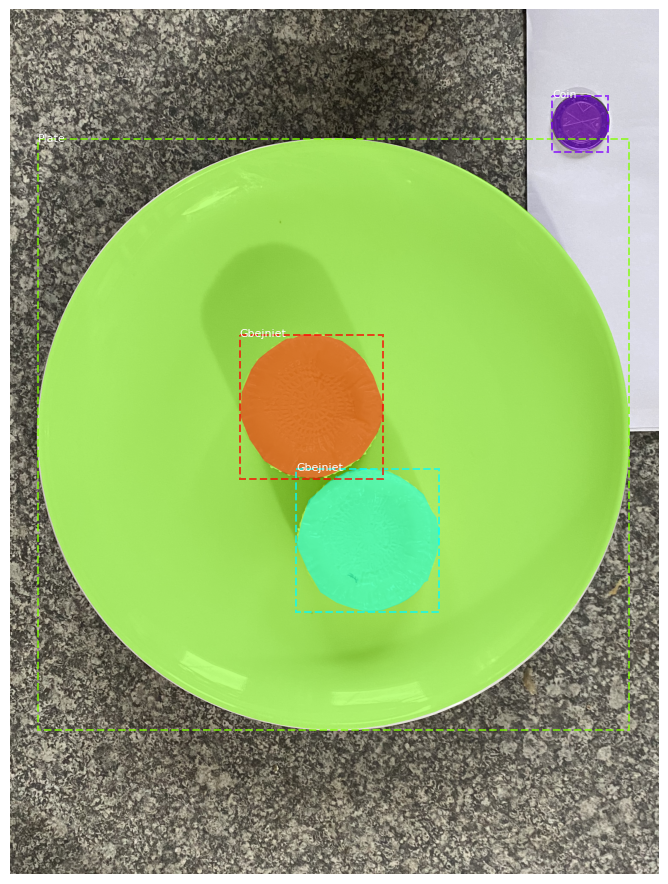

In [10]:
#random.seed(12)
#Image_id 5 is good
image_id = random.choice(dataset_val
                           .image_ids)
#image_id = 59
image = dataset_val.load_image(image_id)
mask, class_ids = dataset_val.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)


# Display image and additional stats
print("image_id ", image_id, dataset_val.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
#("Image Id ",image_id)

# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset_val.class_names)

original_image=image

# NOTE - THINGS TO DO FOR CALORE ESTIMATION
If we want to get the estimation of carbs from each item we need to do this
 - Divide the number of pixels of the area of a plate by the average of area of each item to find the maximum number of items on the plate.
 - Then we can multiply that number by the calories per item to get the maximum calories in a plate of that food item.
 - Now we need to find an average of calories per cm2 for each object (Which is easy because we just do simple proportion from number of pixels in plate by its cm2 value)
 to get the calories
 - Once we have that we can divide the maximum calories on each plate divided by the calories per cm2
 - That will give us



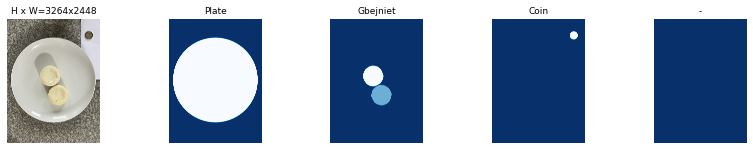

Class : 8
Total Pixels  3899745
Class : 7
Total Pixels  35149
Class : 3
Total Pixels  445215
Class : 3
Total Pixels  445215


In [13]:
# Printing the Individual masks total pixel sum
import numpy as np
visualize.display_top_masks(image,mask,class_ids,dataset_val.class_names)

for i in class_ids:
    print('Class :',i)
    print('Total Pixels ',mask[:,:,np.where(class_ids == i)[0]].sum())

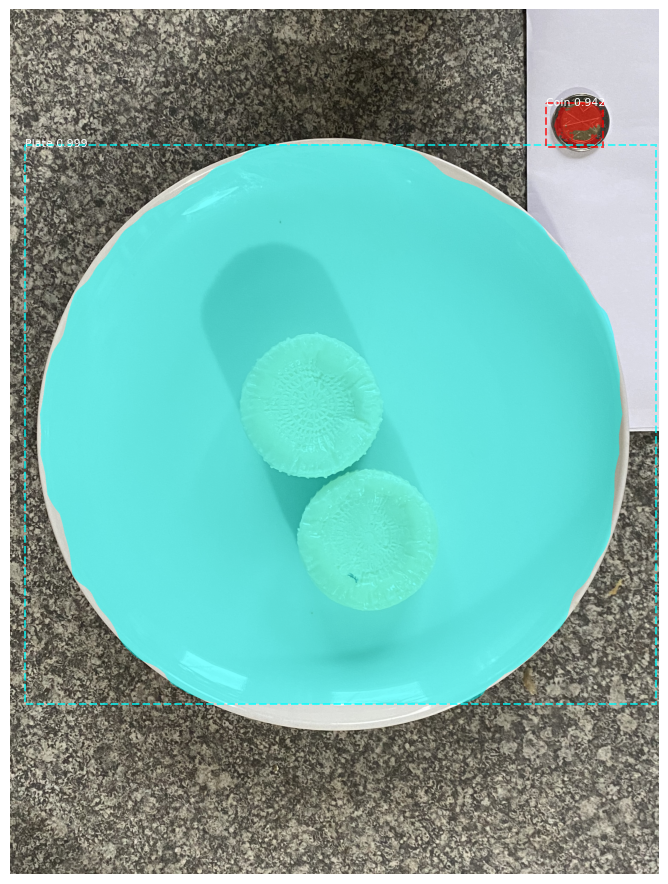

Time Lapsed = 0:0:20.41685175895691
None


In [11]:
import time
def time_convert(sec):
  mins = sec // 60
  sec = sec % 60
  hours = mins // 60
  mins = mins % 60
  print("Time Lapsed = {0}:{1}:{2}".format(int(hours),int(mins),sec))

start_time = time.time()
results = model.detect([original_image], verbose=0)


r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'])

end_time = time.time()
time_lapsed = end_time - start_time
print(time_convert(time_lapsed))

In [12]:
for i in range(r['masks'].shape[-1]):
#   print(i)
    masked_food_pixels=r['masks'][:,:,i].sum()
    class_name=dataset_val.class_names[r['class_ids'][i]]
    print(masked_food_pixels, class_name)

3762823 Plate
19792 Coin


# Approach Calorie estimation
The calorie estimation requires the weight of the food product to be accurate 

---

As we have only the image with us we need to estimate the weight of the food with the provided image


---

Systems with multiple should find it easy to analyse depth of the food presented but pinhole cameras lack the functionality

---


For this purpose we choose refrencing a known object in the image and computing the size of food in image


---


Using known object surface area  we calculate the 'pixel per inches square" value for the given image which gives off the pixel density for an inch square of real life area so that we can compute the real life  surface area hold by  the shown food item


---

# real_food_area = masked_food_pixel_area / pixels_per_inch

In [11]:

masked_plate_pixels=1130972
real_plate_size=12
real_plate_area=113.04
pixels_per_inch_sq=masked_plate_pixels/real_plate_area
calories=[]
items=[]
for i in range(r['masks'].shape[-1]):
#   print(i)
  masked_food_pixels=r['masks'][:,:,i].sum()
  class_name=dataset_val.class_names[r['class_ids'][i]]
  real_food_area=masked_food_pixels/pixels_per_inch_sq
  calorie=food.get_calorie(class_name,real_food_area)
  calories.append(calorie)
  items.append(class_name)
  print("{1} with {0} calories".format(int(calorie),class_name))

bread with 130 calories
pasta with 172 calories
beans with 13 calories
veal breaded cutlet with 190 calories


### Plotting the acquired calories

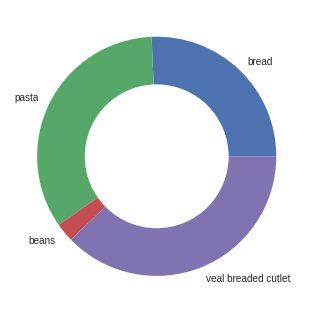

In [12]:

 
# Create a pieplot
plt.pie(calories,labels=items)
#plt.show()
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()


# Evaluation of the model
We compute average precision of 40 pictures and print out the average 

In [0]:
image_ids = np.random.choice(dataset_val.image_ids, 40)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))

mAP:  0.936666666790843


In [0]:
import tensorflow as tf

In [15]:
activations = model.run_graph([image], [
    ("input_image",        tf.identity(model.keras_model.get_layer("input_image").output)),
    ("res2c_out",          model.keras_model.get_layer("res2c_out").output),
    ("res3c_out",          model.keras_model.get_layer("res3c_out").output),
    ("rpn_bbox",           model.keras_model.get_layer("rpn_bbox").output),
    ("roi",                model.keras_model.get_layer("ROI").output),
])

input_image              shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10001  float32
res2c_out                shape: (1, 256, 256, 256)    min:    0.00000  max:   23.48830  float32
res3c_out                shape: (1, 128, 128, 512)    min:    0.00000  max:   27.89676  float32
rpn_bbox                 shape: (1, 261888, 4)        min:  -10.53057  max:   49.47235  float32
roi                      shape: (1, 1000, 4)          min:    0.00000  max:    1.00000  float32


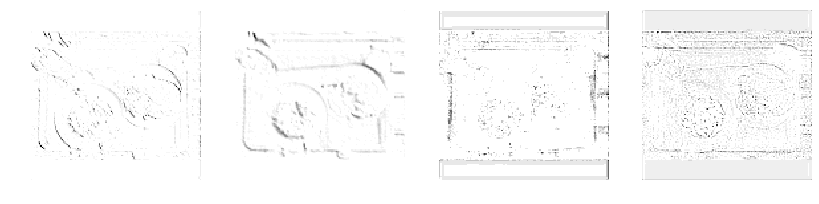

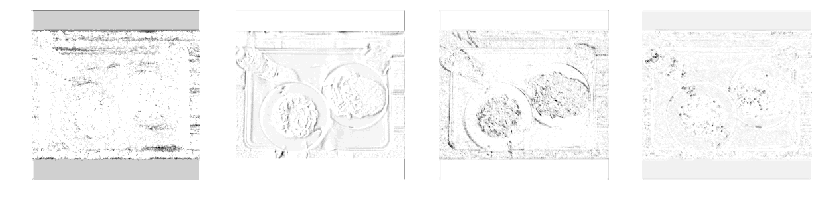

In [17]:
import numpy as np
visualize.display_images(np.transpose(activations["res3c_out"][0,:,:,:4], [2, 0, 1]), cols=4)
visualize.display_images(np.transpose(activations["res2c_out"][0,:,:,:4], [2, 0, 1]), cols=4)
'''